# Clase 5
# Análisis exploratorio/descriptivo de los datos

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [321]:
stroke_df = pd.read_csv('../datasets/stroke.csv')

In [322]:
pd.set_option('display.max_columns', None)
stroke_df.sample(25) 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
637,3130,Female,56.0,0,0,Yes,Private,Rural,112.43,54.6,never smoked,0
3594,41122,Female,62.0,0,0,Yes,Private,Rural,226.38,47.4,never smoked,0
4908,60426,Female,69.0,0,0,Yes,Self-employed,Urban,67.55,38.1,Unknown,0
2713,63029,Male,32.0,0,0,Yes,Private,Rural,115.86,33.3,never smoked,0
1457,40253,Male,27.0,0,0,No,Private,Rural,191.79,NaN,smokes,0
3023,32127,Female,26.0,0,0,Yes,Govt_job,Urban,84.69,25.0,never smoked,0
1441,36858,Female,40.0,0,0,Yes,Private,Rural,72.76,24.0,formerly smoked,0
3830,29419,Female,32.0,0,0,Yes,Private,Urban,81.92,38.0,never smoked,0
1949,40371,Female,47.0,0,0,Yes,Private,Urban,62.47,26.5,never smoked,0
4812,41875,Female,45.0,0,0,Yes,Private,Urban,71.40,28.4,smokes,0


In [323]:
# features (columnas que van a alimentar a mi modelo de machine learning)
# target value: variable de interés (stroke)

### Tipos de datos

Es importante entender el tipo de datos de nuestras variables ya que eso impacta finalmente en la decisión de que gráficos llevar adelante.

In [324]:
stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [325]:
stroke_df.shape

(5110, 12)

In [326]:
print("El dataset de strokes tiene", stroke_df.shape[0], "de filas y tiene", stroke_df.shape[1], " columnas")

El dataset de strokes tiene 5110 de filas y tiene 12  columnas


### Hipótesis

- Los casados tienen más probabilidad de sufrir un stroke
- Las personas con hiperstensión y fumadores tienen mayor probabilidad de sufrir un ACV
- La edad es un factor de riesgo para ACV
- Los empleados en el sector privado tienen más probabilidad de sufrir un stroke
- Quienes viven en ciudades tienen una probablidad mayor de sufrir un stroke
- A mayor nivel de glucosa, mayor probabilidad de sufrir un infarto

## Clases desbalanceadas

Se considera que una clase está desbalanceada si tiene +- 15% de datos respecto a otra clase

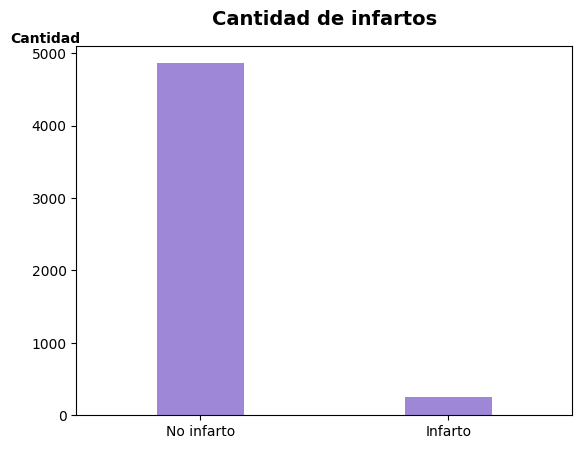

In [327]:
sns.countplot(data=stroke_df, x='stroke', width= 0.35, color='#997AE5')
plt.xlabel(None)
plt.xticks([0, 1], ["No infarto", "Infarto"]) # las leyendas por categoría
plt.ylabel("Cantidad", loc= 'top', fontweight= 'bold', rotation= 'horizontal', labelpad= -35)
plt.title("Cantidad de infartos", {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.show()

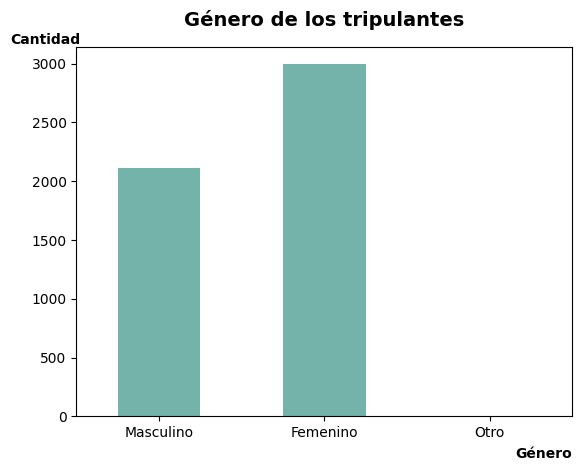

In [328]:
sns.countplot(data=stroke_df, x='gender', width= 0.50, color='#68BEB2')
plt.xlabel("Género", fontweight= 'bold', labelpad= 5.0, loc= 'right', )
plt.xticks([0,1,2], ["Masculino", "Femenino","Otro"]) # las leyendas por categoría
plt.ylabel("Cantidad", loc= 'top', fontweight= 'bold', rotation= 'horizontal', labelpad= -35)
plt.title("Género de los tripulantes", {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.show()

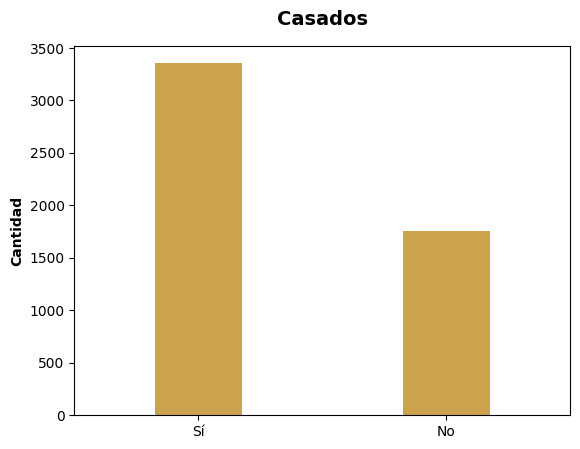

In [329]:
sns.countplot(data=stroke_df, x='ever_married', width= 0.35, color='#E1A938')
plt.xticks(['Yes', 'No'], ["Sí", "No"])
plt.xlabel(None)
plt.ylabel("Cantidad", fontweight= 'bold') 
plt.title("Casados", {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.show()

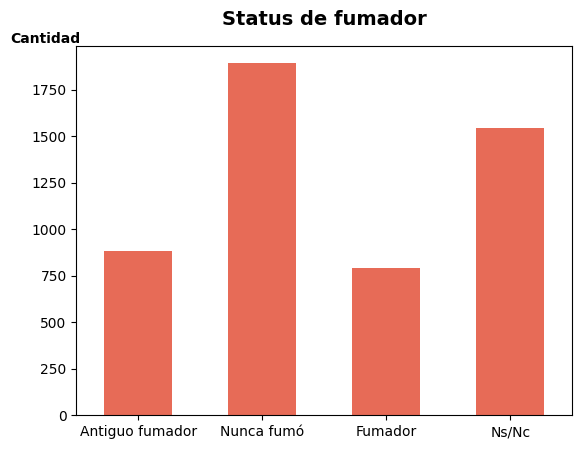

In [330]:
sns.countplot(data=stroke_df, x='smoking_status', width= 0.55, color='#EF654F', saturation=0.9)
plt.xticks(['formerly smoked', 'never smoked', 'smokes', 'Unknown'], ['Antiguo fumador', 'Nunca fumó', 'Fumador', 'Ns/Nc'])
plt.xlabel(None)
plt.ylabel("Cantidad", loc= 'top', fontweight= 'bold', rotation= 'horizontal', labelpad= -35)
plt.title("Status de fumador", {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.show()

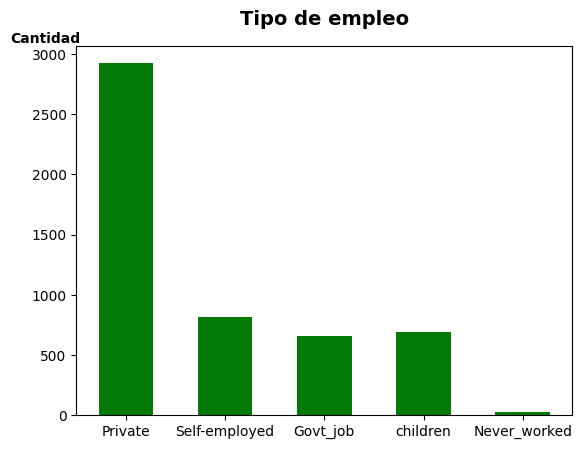

In [331]:
sns.countplot(data=stroke_df, x='work_type', width= 0.55, color='green', saturation=0.9)
plt.xlabel(None)
plt.ylabel("Cantidad", loc= 'top', fontweight= 'bold', rotation= 'horizontal', labelpad= -35)
plt.title("Tipo de empleo", {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.show()

## Trabajamos sobre valores nulos en nuestro Dataset

In [332]:
print(f'Valores nulos en nuestros features\n{stroke_df.isna().sum()}')

Valores nulos en nuestros features
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


> Tenemos 201 valores nulos sobre el feature BMI (Indice de masa corporal)

Técnicas de reemplazo:

- Reemplazar por la media
- Reemplazar por la mediana
- Reemplazar por IQR 

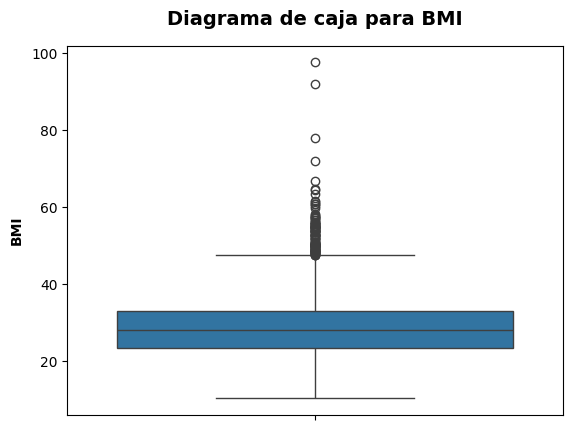

In [333]:
sns.boxplot(data=stroke_df, y = 'bmi')
plt.title("Diagrama de caja para BMI",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.ylabel("BMI", fontweight= 'bold', labelpad= 5)
plt.show()

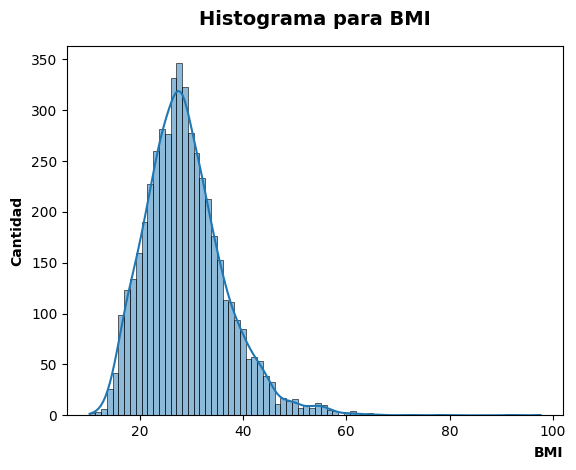

In [334]:
sns.histplot(data=stroke_df, x='bmi', kde=True)
plt.title("Histograma para BMI",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.xlabel("BMI", fontweight= 'bold', labelpad= 5.0, loc= 'right', )
plt.ylabel("Cantidad", fontweight= 'bold', labelpad= 5)
plt.show()

Al detectar muchos valores atípicos decidimos reemplazar estos nulos por alguna medida que sea robusta. Por ejemplo, la mediana

In [335]:
bmiMedian = stroke_df['bmi'].median()
stroke_df['bmi'].fillna(bmiMedian, inplace=True)

In [336]:
# Ahora volvemos a comprobar los valores nulos, vemos que bmi tiene 0
stroke_df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Medidas de tendencia central , de posición y de dispersión

In [337]:
round(stroke_df.describe(), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,5110.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.86,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.70,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.80,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,32.80,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


### Medidas de dispersión

- Varianza
- Desvío estándar
- Desviación media

En lineas generales, las medidas de dispersión miden el grado de dispersión de una V.A respecto a la media

Respecto de la edad [años]

La media es de 43,226 años y el desvío estándar (std) es de 22.61 años
La media es de 43,226 años y la varianza (std) es de 484 años^2

Std = $ \sqrt(Var(x)) $

## Variables continuas -> diagramas de caja e histogramas

- bmi
- age
- glucose

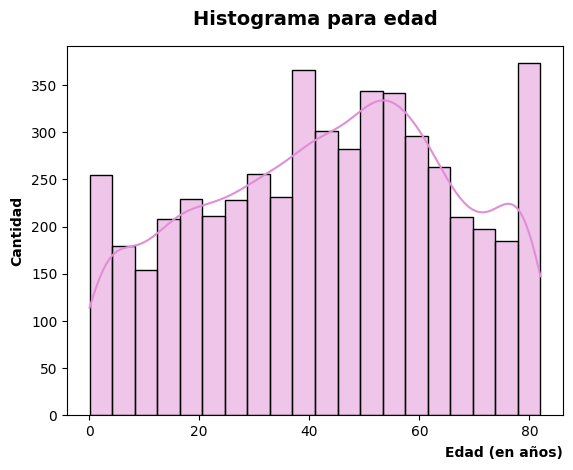

In [338]:
sns.histplot(data=stroke_df,x='age', kde=True,  color= '#E08ED6')
plt.title("Histograma para edad",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.xlabel("Edad (en años)", fontweight= 'bold', labelpad= 5.0, loc= 'right', )
plt.ylabel("Cantidad", fontweight= 'bold', labelpad= 5)
plt.show()

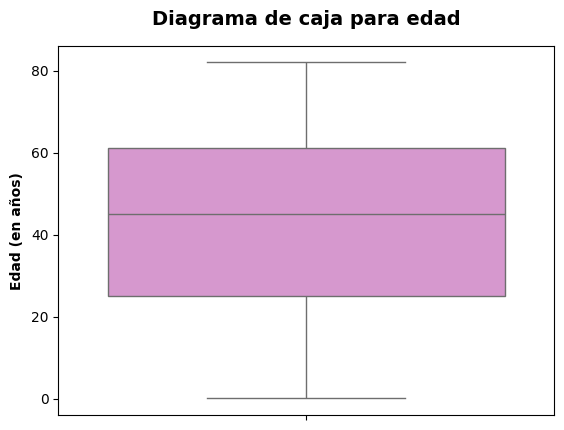

In [339]:
sns.boxplot(data=stroke_df,y='age', color= '#E08ED6')
plt.title("Diagrama de caja para edad",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.ylabel("Edad (en años)", fontweight= 'bold', labelpad= 5)
plt.show()

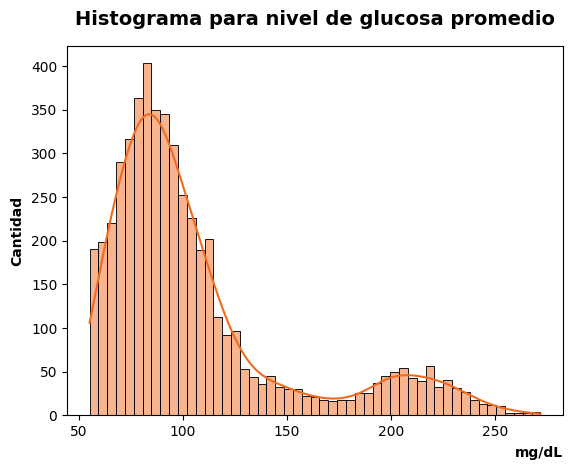

In [340]:
# Glucosa
sns.histplot(data=stroke_df,x='avg_glucose_level', color= '#F06B20', kde= True)
plt.title("Histograma para nivel de glucosa promedio",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.xlabel("mg/dL", fontweight= 'bold', labelpad= 5.0, loc= 'right' )
plt.ylabel("Cantidad", fontweight= 'bold', labelpad= 5)
plt.show()


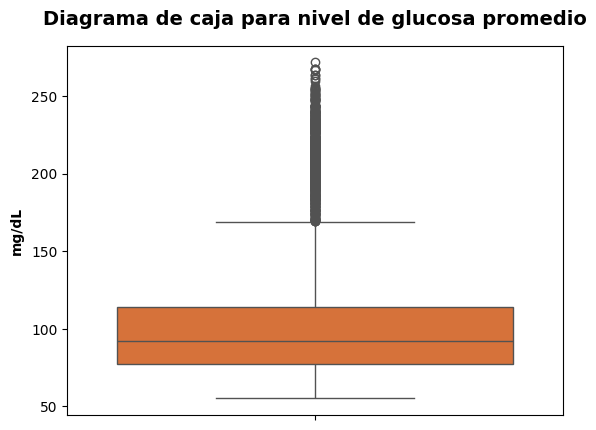

In [341]:
sns.boxplot(data=stroke_df,y='avg_glucose_level', color= '#F06B20')
plt.title("Diagrama de caja para nivel de glucosa promedio",  {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.ylabel("mg/dL", fontweight= 'bold', labelpad= 5)
plt.show()

## Variables categóricas / discretas

Diagramas de barras / diagramas de torta / countplot

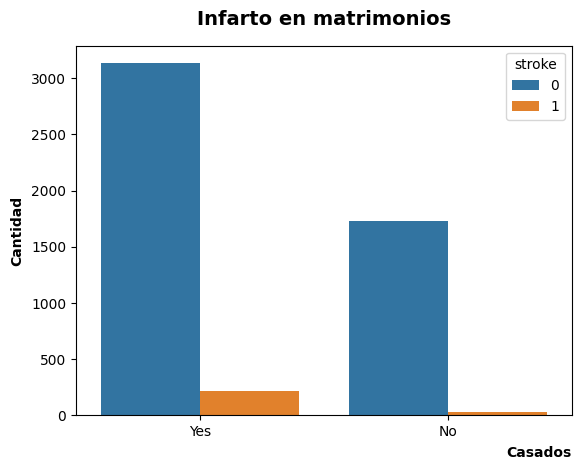

In [342]:
sns.countplot(data=stroke_df,x='ever_married', hue='stroke')
plt.xlabel("Casados", fontweight= 'bold', labelpad= 5.0, loc= 'right')
plt.ylabel("Cantidad", fontweight= 'bold', labelpad= 5)
plt.title("Infarto en matrimonios", {
    'color': 'black',
    'weight': 'bold',
    'size': 14,
}, pad= 15)
plt.show()

## Covarianza y correlación

Comprender la relación entre 2 variables continuas. La covarianza indica si ambas variables varian en la misma dirección (covarianza positiva) o en direccion opuesta

No importa el valor de la covarianza importa el signo

Correlación explica el cambio de una variable (proporción). Este varia entre [-1;1] Siendo 1 que las variables están perfectamente correlacionadas, 0 que no hay correlación alguna y -1 que están correlacionadas negativamente


### Matriz de correlación



In [343]:
# Eliminar la columna id
stroke_df.drop(columns=['id'],inplace=True) # eliminar la columna id del dataframe

In [344]:
stroke_df.corr()
# df.corr() could not convert string to float -> df.corr(numeric_only=True)

C:\Users\Equipo\AppData\Local\Temp\ipykernel_11924\411915646.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stroke_df.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


C:\Users\Equipo\AppData\Local\Temp\ipykernel_11924\3233536714.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stroke_df.corr(), annot=True, cmap='Blues')


<Axes: >

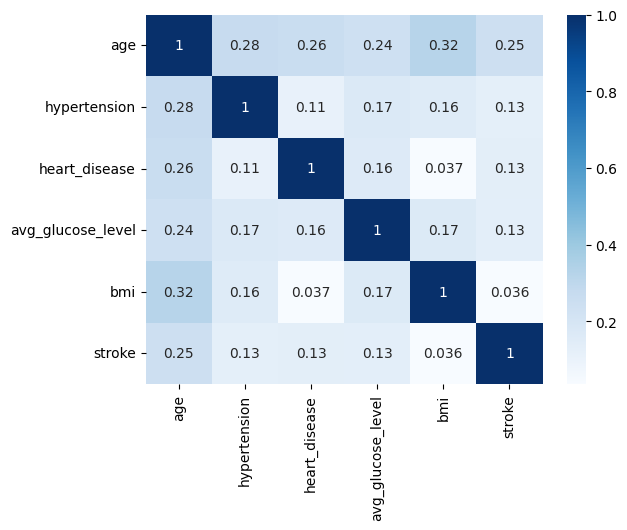

In [345]:
sns.heatmap(stroke_df.corr(), annot=True, cmap='Blues')

In [346]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Debemos pasar todos los features de tipo "object" (categóricas) a features numericos para poder evaluar la relación contra nuestra target value (stroke)

- get_dummies (más simple de implementar y viene por defecto en pandas)
- OneHotEncoding
- LabelEncoding

Primero vemos las categorías de cada variable de tipo "object"

In [347]:
print(set(stroke_df['ever_married']))
print(set(stroke_df['work_type']))
print(set(stroke_df['Residence_type']))
print(set(stroke_df['smoking_status']))

{'No', 'Yes'}
{'Private', 'Never_worked', 'children', 'Self-employed', 'Govt_job'}
{'Urban', 'Rural'}
{'formerly smoked', 'Unknown', 'smokes', 'never smoked'}


Ejemplo: obtenemos dummies de la columna 'ever_married'

In [348]:
# Del dataframe stroke_df convierte a valores discretos los elementos de la columna ever_married. No tiene InPlace = True
# stroke_df = pd.get_dummies(stroke_df, columns=['ever_married','work_type','smoking_status'], drop_first=True)
stroke_df = pd.get_dummies(stroke_df, columns=['ever_married'], drop_first=True) # drop_first elimina los 0 (la alternativa)

In [349]:
stroke_df

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_Yes
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,28.1,never smoked,1,1
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,1
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Private,Urban,83.75,28.1,never smoked,0,1
5106,Female,81.0,0,0,Self-employed,Urban,125.20,40.0,never smoked,0,1
5107,Female,35.0,0,0,Self-employed,Rural,82.99,30.6,never smoked,0,1
5108,Male,51.0,0,0,Private,Rural,166.29,25.6,formerly smoked,0,1


C:\Users\Equipo\AppData\Local\Temp\ipykernel_11924\3233536714.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stroke_df.corr(), annot=True, cmap='Blues')


<Axes: >

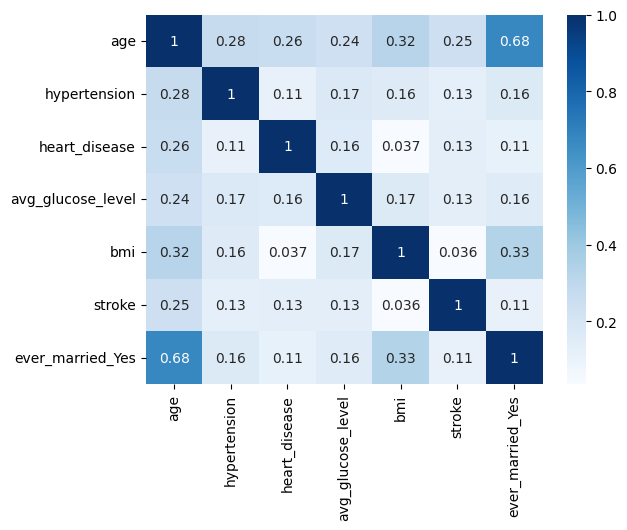

In [350]:
sns.heatmap(stroke_df.corr(), annot=True, cmap='Blues')

Ahora obtenemos dummies del resto de las variables categóricas

In [351]:
stroke_df = pd.get_dummies(stroke_df, columns=['smoking_status', 'work_type', 'Residence_type'], drop_first=True)

In [352]:
pd.set_option('display.max_columns', None)
stroke_df.sample(5) 

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_Yes,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
1467,Male,8.0,0,0,107.69,20.3,0,0,0,0,0,0,0,0,1,1
496,Male,5.0,0,0,122.19,35.0,0,0,0,0,0,0,0,0,1,0
1383,Female,24.0,0,0,89.68,38.7,0,1,0,1,0,0,1,0,0,1
4233,Female,3.0,0,0,108.32,14.2,0,0,0,0,0,0,0,0,1,0
2239,Female,46.0,0,0,75.09,28.7,0,1,0,1,0,0,1,0,0,0


C:\Users\Equipo\AppData\Local\Temp\ipykernel_11924\3392967027.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stroke_df.corr(), annot=True, cmap='coolwarm')


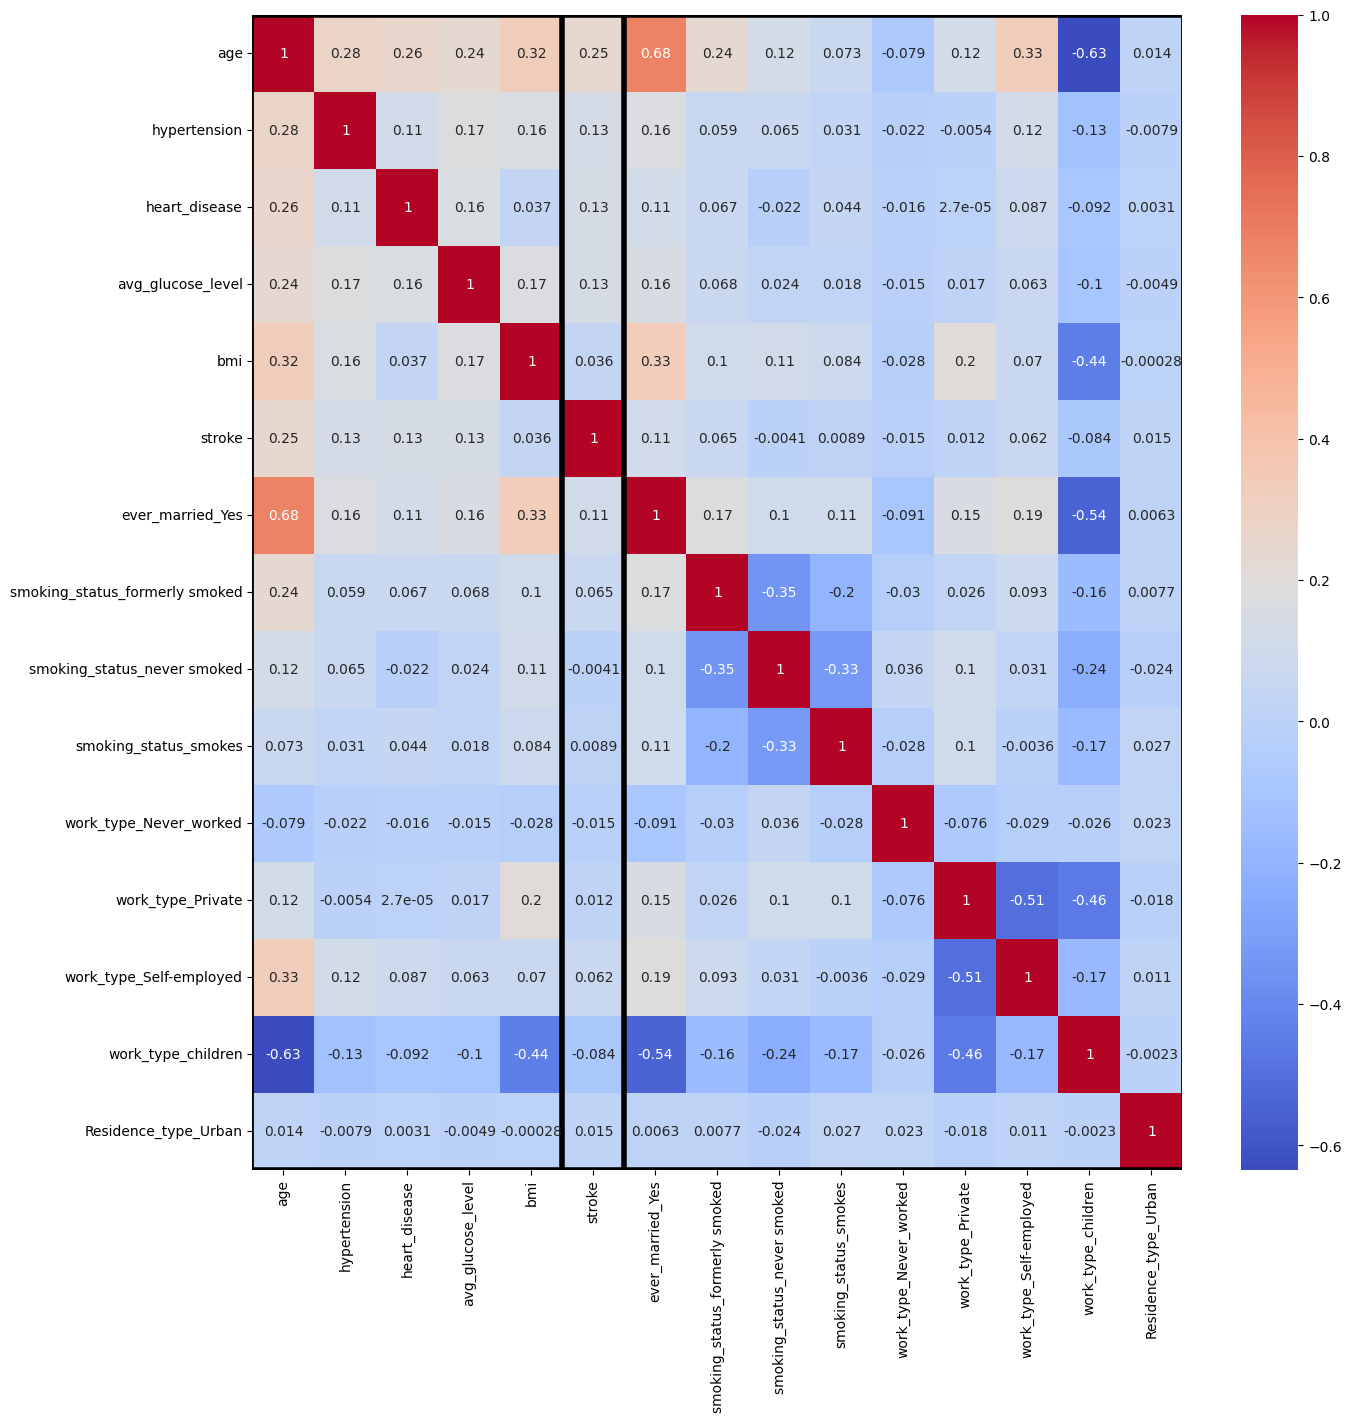

In [353]:
plt.figure(figsize= (15,15))
sns.heatmap(stroke_df.corr(), annot=True, cmap='coolwarm')

plt.axvline(x=0, color='black', linewidth=2)
plt.axvline(x=15, color='black', linewidth=2)
plt.axvline(x=5, color='black', linewidth=4)
plt.axvline(x=6, color='black', linewidth=4)


plt.axhline(y=0, color='black', linewidth=4)
plt.axhline(y=15, color='black', linewidth=4)

plt.show()

### Hipótesis

- Los casados tienen más probabilidad de sufrir un stroke  --> **Correlación moderada**

- Las personas con hiperstensión y fumadores tienen mayor probabilidad de sufrir un ACV  ---> **Correlación moderada**

- La edad es un factor de riesgo para ACV  --> **Correlación moderada**

- Los empleados en el sector privado tienen más probabilidad de sufrir un stroke  --> **Correlación baja**

- Quienes viven en ciudades tienen una probablidad mayor de sufrir un stroke  --> **Correlación baja**

- A mayor nivel de glucosa, mayor probabilidad de sufrir un infarto --> **Correlación baja**

## Outliers

Valores atípicos

Rango intercuartil = Q3 - Q1


Umbral superior = DATO > Q3 + 1.5IQR

Umbral inferior =  Dato < Q1 - 1.5IQR

In [354]:
Q1 = stroke_df['bmi'].quantile(0.25) # percentil 25
Q3 = stroke_df['bmi'].quantile(0.75)
iqr = Q3 - Q1

In [355]:
umbral_superior = Q3 + 1.5 * iqr
umbral_inferior = Q1 - 1.5 * iqr

In [356]:
print("Un valor de BMI por debajo de",round(umbral_inferior,2), "es un outlier")
print("Un valor de BMI por arriba de",round(umbral_superior,2), "es un outlier")

Un valor de BMI por debajo de 10.3 es un outlier
Un valor de BMI por arriba de 46.3 es un outlier


In [357]:
# Agarrar de la columna bmi los valores mayores a mi umbral superior o los menores a mi umbral inferior
outliers = stroke_df[(stroke_df['bmi'] > umbral_superior) | (stroke_df['bmi'] < umbral_inferior)]

In [358]:
print("Cantidad de outliers en BMI",len(outliers))

Cantidad de outliers en BMI 126


In [359]:
outliers

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_Yes,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
21,Female,52.0,1,0,233.29,48.9,1,1,0,1,0,0,0,1,0,1
66,Female,70.0,0,0,221.58,47.5,1,1,0,1,0,0,1,0,0,1
113,Female,45.0,0,0,224.10,56.6,1,1,0,1,0,0,1,0,0,0
254,Female,47.0,0,0,210.95,50.1,0,1,0,0,0,0,1,0,0,1
258,Female,74.0,1,0,205.84,54.6,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4906,Female,53.0,0,0,70.51,54.1,0,1,0,1,0,0,1,0,0,1
4952,Male,51.0,1,0,211.83,56.6,0,1,0,1,0,0,0,1,0,0
5009,Female,50.0,0,0,126.85,49.5,0,1,1,0,0,0,0,1,0,0
5057,Female,49.0,0,0,69.92,47.6,0,1,0,1,0,0,0,0,0,1


In [360]:
stroke_df.index # El índice que agrega Pandas. Como va de uno en uno, es un rango (RangeIndex), start=0 (empieza en cero), 
                # stop=5110 (termina en 5110) y va de uno en uno (step=1)

RangeIndex(start=0, stop=5110, step=1)

In [361]:
outliers.index # Acá es distinto, no es rango sino solo números enteros, y los va poniendo a cada uno

Int64Index([  21,   66,  113,  254,  258,  270,  333,  341,  358,  368,
            ...
            4779, 4838, 4847, 4858, 4894, 4906, 4952, 5009, 5057, 5103],
           dtype='int64', length=126)

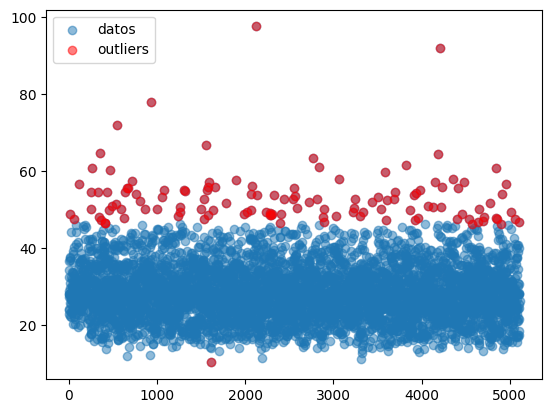

In [362]:
# df.index es el valor en x (el índice que agrega Pandas)
plt.scatter(stroke_df.index,stroke_df['bmi'], label='datos', alpha=0.5)
plt.scatter(outliers.index,outliers['bmi'], color='red', label='outliers', alpha=0.5)
plt.legend()